## Downloading the data from Kaggle

In [6]:
## Prerequisites
#!pip install kaggle --upgrade
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
## Downloading data command
!kaggle datasets download -d manchunhui/us-election-2020-tweets

 95% 336M/353M [00:03<00:00, 79.5MB/s]
100% 353M/353M [00:03<00:00, 94.6MB/s]


In [8]:
!mkdir content/data
!unzip us-election-2020-tweets.zip -d data

mkdir: cannot create directory ‘content/data’: No such file or directory
Archive:  us-election-2020-tweets.zip
  inflating: data/hashtag_donaldtrump.csv  
  inflating: data/hashtag_joebiden.csv  


## Download Pyspark

In [ ]:
!pip install pyspark 

## Import Header Files

In [12]:
## Trying to get perform the code from python perspective

## Python 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


## Spark
import pyspark.sql.functions as F
from pyspark.sql import Row
from pyspark import SparkContext
from pyspark.sql import SparkSession

# Create Spark Session
spark = SparkSession.builder.master("local[1]").appName('Twitter Sentiment Analysis').getOrCreate()
#spark = SparkContext.getOrCreate()

# from pyspark.sql import SQLContext

# sqlContext = SQLContext(sc)

In [17]:
### Just click cntrl + / to uncomment the respective way you want to do this 

## Okay so the issue that I run into is that I am unable to read data in using spark
## So now I will convert pandas dataframe into spark dataframe 
## We can do this now and then worry about data loading later 


# Python
trump = pd.read_csv('/content/data/hashtag_donaldtrump.csv',lineterminator='\n')
biden = pd.read_csv('/content/data/hashtag_joebiden.csv',lineterminator='\n')

# print(trump.info())
# print(biden.info())

## Spark

# Creating spark data frame using pandas
# trump_df = spark.createDataFrame(trump)
# biden_df = spark.createDataFrame(biden)
for col in trump.columns: trump[col] = trump[col].map(str)
trump_df = spark.createDataFrame(trump)
trump_df.cache() # Remember this shit is really important I think 


## Failed tries these didn't work so just bear this in mind
# trump_df = spark.read.option("delimiter", "\n").csv('/content/data/hashtag_donaldtrump.csv')
# trump_df = spark.read.option("lineterminator","\n").csv('/content/data/hashtag_donaldtrump.csv')
#trump_df = spark.read.format('csv').option("header", 'true').load("/content/data/hashtag_donaldtrump.csv")
#biden_df = spark.read.format('csv').option("header", 'true').load("/content/data/hashtag_joebiden.csv")



DataFrame[created_at: string, tweet_id: string, tweet: string, likes: string, retweet_count: string, source: string, user_id: string, user_name: string, user_screen_name: string, user_description: string, user_join_date: string, user_followers_count: string, user_location: string, lat: string, long: string, city: string, country: string, continent: string, state: string, state_code: string, collected_at: string]

In [55]:
#frame[‘DataFrame Column’]= frame[‘DataFrame Column’].map(str)

# it takes a while to run this took me 3 minutes
# Making all columns string type in the pandas dataframe 
# Then convert the pandas data to spark dataframe
# for col in trump.columns: trump[col] = trump[col].map(str)
# trump_df = spark.createDataFrame(trump)

#trump_df = (spark.read.format("csv").options(header="true").load("/content/data/hashtag_donaldtrump.csv"))

In [18]:
trump_df.printSchema()

root
 |-- created_at: string (nullable = true)
 |-- tweet_id: string (nullable = true)
 |-- tweet: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- retweet_count: string (nullable = true)
 |-- source: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- user_name: string (nullable = true)
 |-- user_screen_name: string (nullable = true)
 |-- user_description: string (nullable = true)
 |-- user_join_date: string (nullable = true)
 |-- user_followers_count: string (nullable = true)
 |-- user_location: string (nullable = true)
 |-- lat: string (nullable = true)
 |-- long: string (nullable = true)
 |-- city: string (nullable = true)
 |-- country: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- state: string (nullable = true)
 |-- state_code: string (nullable = true)
 |-- collected_at: string (nullable = true)



In [ ]:
# Printing the data frame more than 3 minute now 
trump_df.show(5)

In [ ]:
# Took me 10 minutes remember to run it wisely 
trump_df.describe()
trump_df.printSchema()

In [13]:
# Adding a new column to differentiate between tweets of Biden and Trump
# Basically adding labels
trump["Candidate"] = "TRUMP"
biden["Candidate"] = "BIDEN" 

# Concat the data frames
Data_Mixed = pd.concat([trump,biden])
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,TRUMP
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,TRUMP


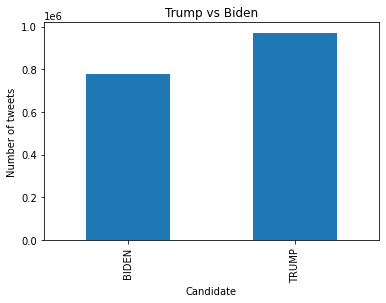

In [14]:
# Plot the number of tweets for each candidate
Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden')
plt.show() 

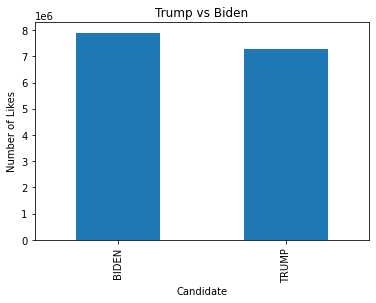

In [15]:
# Comparison of likes
Data_Mixed.groupby('Candidate')['likes'].sum().plot.bar()
plt.ylabel('Number of Likes')
plt.title('Trump vs Biden')
plt.show() 

In [16]:
Data_Mixed.country.value_counts() 

United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Mali                             2
Northern Mariana Islands         1
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Name: country, Length: 189, dtype: int64

In [17]:
Data_Mixed['country']=Data_Mixed['country'].replace({"United States of America" : "US", "United States" : "US"}) 

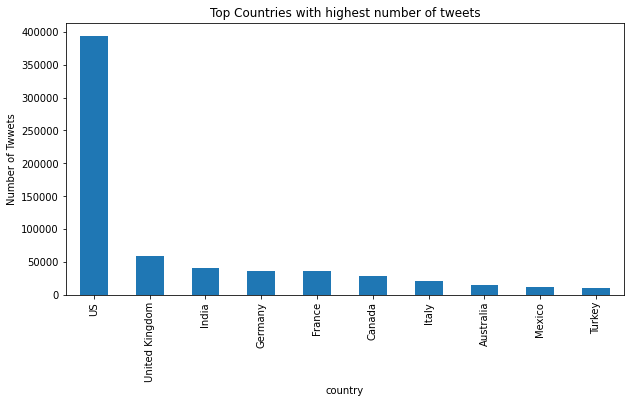

In [18]:
# Countries with highest number of tweets
plt.figure(figsize=(10,5))
Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Twwets')
plt.title('Top Countries with highest number of tweets')
plt.show() 

In [ ]:
# List of top 10 countries with highest number of tweets
top10Countries = Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [ ]:
# Twwets for Biden and Trump from each country
tweet_df = Data_Mixed.groupby(['country','Candidate'])['tweet'].count().reset_index()
tweet_df = tweet_df[tweet_df['country'].isin(top10Countries)]
tweet_df

In [ ]:
#Plot top 10 countries with highest number of tweets for trump and biden
plt.figure(figsize=(20,8))
sns.barplot(data=tweet_df,x='country',y='tweet',hue='Candidate')
plt.show()

In [ ]:
# List of top 10 states with highest number of tweets
top10States = Data_Mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [ ]:
# Twwets for Biden and Trump from each state in top10 states
state_df = Data_Mixed.groupby(['state','Candidate'])['tweet'].count().reset_index()
state_df = state_df[state_df['state'].isin(top10States)] 
state_df

## Cleaning the Text 

In [ ]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text